# Проект по теме "Численные методы"

## "Определение стоимости автомобилей"

**Описание проекта**
* Компания по продаже б/у автомобилей разрабатывает новую функцию своего приложения. В нём можно автоматически определить рыночную стоимость своего автомобиля.

**Цель:** 
* Необходимо построить модель для определения стоимости автомобилей на основании технических характеристик, комплектаций других данных.

**Метрики оптимизации:**
* Качество предсказания;
* Скорость предсказания;
* Время обучения.

**Описание данных**

**Признаки**
* **`DateCrawled`** — дата скачивания анкеты из базы
* **`VehicleType`** — тип автомобильного кузова
* **`RegistrationYear`** — год регистрации автомобиля
* **`Gearbox`** — тип коробки передач
* **`Power`** — мощность (л. с.)
* **`Model`** — модель автомобиля
* **`Kilometer`** — пробег (км)
* **`RegistrationMonth`** — месяц регистрации автомобиля
* **`FuelType`** — тип топлива
* **`Brand`** — марка автомобиля
* **`Repaired`** — была машина в ремонте или нет
* **`DateCreated`** — дата создания анкеты
* **`NumberOfPictures`** — количество фотографий автомобиля
* **`PostalCode`** — почтовый индекс владельца анкеты (пользователя)
* **`LastSeen`** — дата последней активности пользователя

**Целевой признак**
* **`Price`** — цена (евро)

**План выполнения работы:**
* 1.Подготовка Данных
  * 1.1 Изучение данных
  * 1.2 Предобработка данных
  * 1.3 Кодирование данных
* 2.Обучение моделей
* 3.Анализ моделей

# 1. Подготовка данных

### 1.1 Изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import time
import os

from scipy import stats as st
from IPython.display import display
from numpy.random import RandomState
from scipy import stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor
from datetime import datetime
from lightgbm import LGBMRegressor



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [2]:
pth1 = 'C:/Users/copok/Documents/Проекты/Яндекс Практикум/11 Определение стоимости автомобилей/autos.csv'
pth2 = '/datasets/autos.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df= pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
def get_data_info(data):
    display(data.sample(5))
    print('-'*50)
    display(data.info()) 
    print('-'*50)
    display(data.isnull().sum()) 
    print('-'*50)
    display(data.describe())
    print('-'*50)
    print('Количество дубликатов:', sum(data.duplicated()))

In [4]:
get_data_info(df)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
58093,2016-03-30 13:50:15,5950,sedan,2003,manual,150,a3,150000,10,petrol,audi,no,2016-03-30 00:00:00,0,96132,2016-04-07 04:44:47
129874,2016-03-23 00:36:57,6000,bus,2003,manual,136,touran,100000,8,gasoline,volkswagen,no,2016-03-22 00:00:00,0,94327,2016-04-05 03:17:12
157469,2016-03-12 18:51:01,1400,sedan,1999,manual,0,bora,125000,12,petrol,volkswagen,no,2016-03-12 00:00:00,0,79100,2016-03-16 00:46:54
258404,2016-03-06 15:38:14,1199,coupe,1997,manual,125,a3,150000,4,petrol,audi,no,2016-03-06 00:00:00,0,32832,2016-03-08 16:16:34
218865,2016-03-23 10:43:34,19800,convertible,2013,manual,122,eos,30000,0,petrol,volkswagen,no,2016-03-23 00:00:00,0,92318,2016-04-07 10:16:30


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen         

None

--------------------------------------------------


DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

--------------------------------------------------


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


--------------------------------------------------
Количество дубликатов: 4


* Данные загружены в **df 354369 строк**
* Имеются пропуски в столбцах тип кузова, тип кпп, модель, тип топлива и была ли машина в ремонте
* Есть 4 дубликката


### 1.2 Предобработка данных

**Сначало избавимся от дублокатов**

In [5]:
df = df.drop_duplicates()
print('Количество дубликатов:', sum(df.duplicated()))

Количество дубликатов: 0


In [6]:
# воспользуемся методом str.lower() для приведения названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Ознакомимся с содержимым признаков.**

**Price**

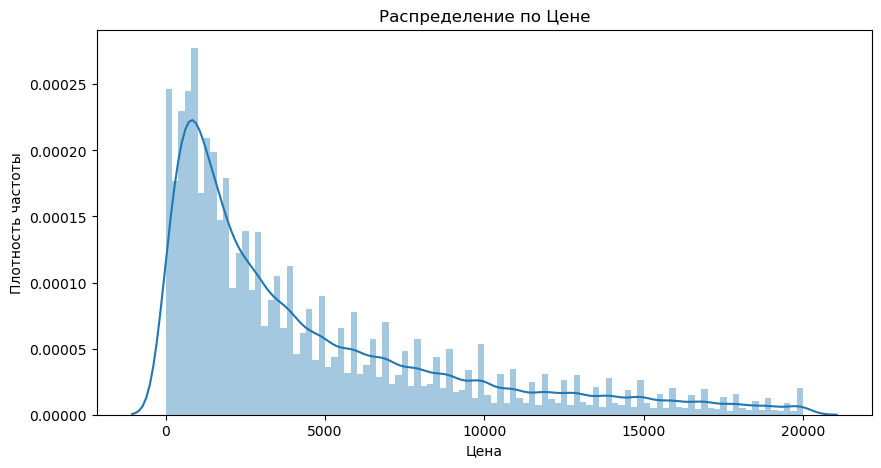

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['price'], bins= 100)
ax.set_title('Распределение по Цене')
plt.xlabel('Цена')
plt.ylabel('Плотность частоты');
plt.show()

* Замечаем, что есть нулевые и околонулевые значения.

In [8]:
df.query('price <= 200').count()

datecrawled          19448
price                19448
vehicletype          12828
registrationyear     19448
gearbox              14889
power                19448
model                16107
kilometer            19448
registrationmonth    19448
fueltype             13314
brand                19448
repaired              9899
datecreated          19448
numberofpictures     19448
postalcode           19448
lastseen             19448
dtype: int64

19448* Установим минимальный ценник в 100 евро. Значения ниже будем отсеивать. В нашем случае это 19448 из 354369 или ~5.5%. Приемлимо.

In [9]:
df = df.query('price >= 200')

**Тип автомобильного кузова. VehicleType.**

* тип кузова заменим на 'unknown' т.к пропущено 37490 строк это 10,5% от df

In [10]:
df['vehicletype'] = df['vehicletype'].fillna('unknown')

**Год регистрации автомобиля. RegistrationYear.**

In [11]:
df['registrationyear'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 1910, 2016,
       2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994, 1991,
       1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1989, 2015,
       1985, 1982, 1976, 1983, 1973, 1969, 1971, 1987, 1988, 1980, 1970,
       1986, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968, 1977,
       1961, 1966, 1975, 1963, 1964, 1960, 1958, 1967, 1956, 3200, 1941,
       9999, 8888, 1500, 2200, 4100, 1962, 1929, 1957, 1940, 2066, 1949,
       2019, 1937, 1951, 1800, 1959, 1953, 1954, 1234, 5300, 9000, 2900,
       6000, 5900, 1000, 5911, 1400, 5000, 4000, 1948, 1952, 8500, 1932,
       1950, 3700, 3800, 4800, 1942, 7000, 1935, 1933, 1936, 3000, 1923,
       2290, 1930, 1001, 9450, 1944, 2500, 1943, 1938, 1934, 1928, 5555,
       1600, 1111, 1039, 2800, 1931, 4500, 1602, 7800, 1947, 1927, 7100,
       1300, 8200, 1946], dtype=int64)

In [12]:
#df.query('registrationyear < 1980 or registrationyear > 2020')
df = df.query('registrationyear >= 1980 and registrationyear <= 2020')

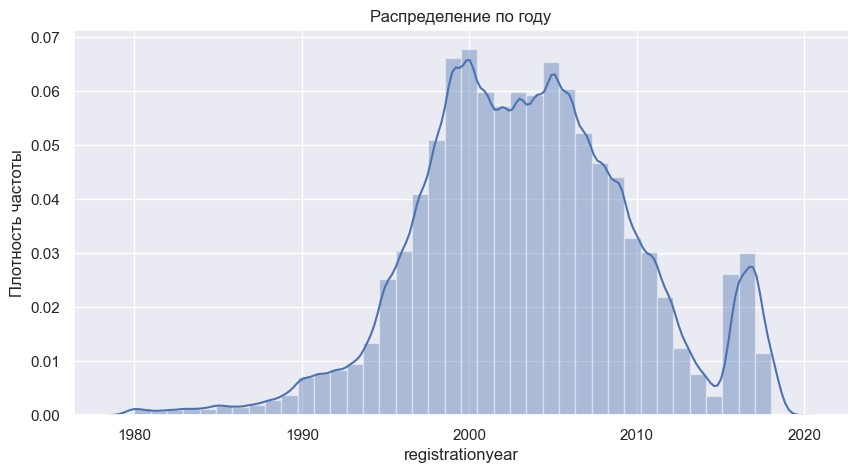

In [13]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['registrationyear'], bins=len(df['registrationyear'].unique()))
ax.set_title('Распределение по году')
plt.ylabel('Плотность частоты');

* Замечаем очень много невероятных значений - больше 2019 года т.к актуальные данные заканчиваются 2019г и меньше 1886 Т.к. первый автомобиль был создан в 1886 году 
* Нужно отсеивать.
* Опотным путем выбрал интервал с 1980-2020гг
* Отсеели 3137 строк что меньше 1%

**Тип коробки передач. Gearbox.**

Пропущены значений 19833 это много так что заменим пропуски на 'unknown' 

In [14]:
df['gearbox'] = df['gearbox'].fillna('unknown')

**Мощность (л. с.). Power**

In [15]:
df['power'].describe()

count    333803.000000
mean        112.400416
std         186.549152
min           0.000000
25%          73.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

* Исходя из логики мы понимаем что мощность не может быть равна 0 и не может привышать(если это конечно не спорткар) 600л.с
* Так что возьмен интервал от 1 до 600л.с


In [16]:
#df.query('power < 30 or power > 600')
# такмх строк 35116 примерно 10% многовато но и работать с такими данными нельзя так что убираем
df = df.query('power >= 30 and power <= 600')

**Модель автомобиля. Model.**

Неопределенных значений 19705. Заменим пропуски на значение "unknown".

In [17]:
df['model'] = df['model'].fillna('unknown')

**Пробег. Kilometer.**

С этими данными все хорошо, пропусков нет

**Месяц регистрации автомобиля. RegistrationMonth.**

In [18]:
df['registrationmonth'].unique()

array([ 5,  8,  6,  7, 10,  0, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

* Значение 0 в логику не вкладывается.
* Посмотрим сколько таких данных и примем решение что с ними делать

In [19]:
df.query('registrationmonth == 0').count()

datecrawled          18735
price                18735
vehicletype          18735
registrationyear     18735
gearbox              18735
power                18735
model                18735
kilometer            18735
registrationmonth    18735
fueltype             14009
brand                18735
repaired              9483
datecreated          18735
numberofpictures     18735
postalcode           18735
lastseen             18735
dtype: int64

19708 строк. Многовато попробуем заменить на 1.  После чего данные год регистрации и месяц регистрации приведем к одной дате и **рассчитаем возраст** автомобиля на момент создания анкеты.

In [20]:
df['registrationmonth'] = df['registrationmonth'].replace(0, 1)

**Расчет возраста автомобиля на момент публикации**

На основании года и месяца регистрации найдем дату регистрации. Отталвиваясь от этой даты и даты создания анкеты найдем возраст машины. Округлим до целых. Т.к. при покупке автомобиля пользователи, обычно, смотрят именно на целое число лет, дроби их не интересуют, поэтому ими мы можем пренебречь.

In [21]:
def gen_date(row):
    return datetime(row['registrationyear'], row['registrationmonth'], 1)

In [22]:
%%time
df['reg_date'] = df.apply(gen_date, axis = 1)

CPU times: total: 3.61 s
Wall time: 3.6 s


In [23]:
df['datecreated'] = pd.to_datetime(df['datecreated'])

In [24]:
df['age'] = df['datecreated'] - df['reg_date']
df['age'] = df['age']/np.timedelta64(1,'Y')

In [25]:
df['age'] = round(df['age'], 0)

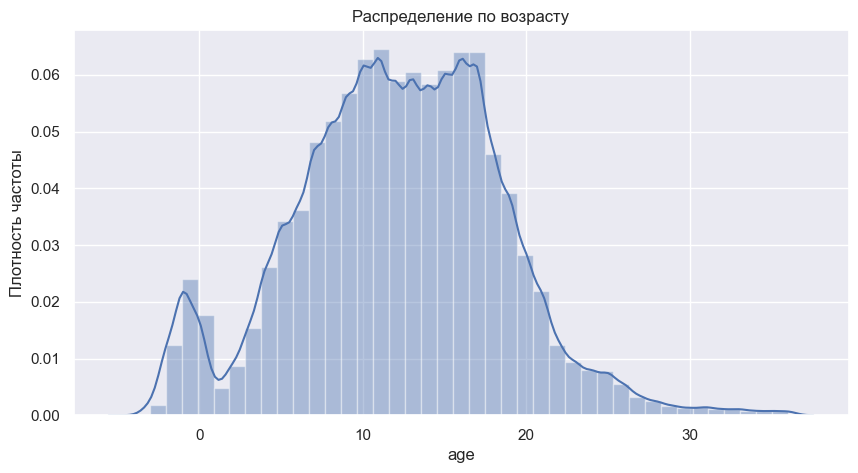

In [26]:
sns.set()
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['age'], bins=len(df['age'].unique()))
ax.set_title('Распределение по возрасту')
plt.ylabel('Плотность частоты');

Проверяем отрицательные значения возраста - дата публикации раньше даты регистрации.

In [27]:
print('Колличество аномальных значений:',
      round(df[df['age'] < 0].shape[0] / df.shape[0] * 100),'%')

Колличество аномальных значений: 4 %


Значений много (~4%), но избавиться от них нужно

In [28]:
df = df.query('age >=0')

In [29]:
print('Колличество аномальных значений:',
      round(df[df['age'] < 0].shape[0] / df.shape[0] * 100),'%')

Колличество аномальных значений: 0 %


**Тип топлива. FuelType.**

Неопределенных значений 32895. Заменим пропуски на значение "unknown".

In [30]:
df['fueltype'] = df['fueltype'].fillna('unknown')

**Марка автомобиля. Brand.**

Здесь всё ок. пропусков нет

**Была машина в ремонте или нет. Repaired.**

71154 неизвестных значений. Удалять столько - затея плохая. Заменим пропуски на значение "unknown".

In [31]:
df['repaired'] = df['repaired'].fillna('unknown')

**Количество фотографий автомобиля. NumberOfPictures.**

In [32]:
print('Колличество значений:',
      round(df[df['numberofpictures'] > 0].shape[0] / df.shape[0] * 100),'%')

Колличество значений: 0 %


Избавимся от этого столбца. Т.к все значения павны нулю.

**Почтовый индекс владельца анкеты (пользователя). PostalCode.**

In [33]:
df['postalcode'].value_counts()

postalcode
10115    798
65428    501
66333    269
60311    260
52525    245
        ... 
83546      1
74937      1
17248      1
31039      1
95691      1
Name: count, Length: 8109, dtype: int64

Избавимся и от этого столбца

In [34]:
get_data_info(df)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,datecreated,numberofpictures,postalcode,lastseen,reg_date,age
37823,2016-03-23 15:45:19,1500,sedan,1991,manual,90,golf,150000,11,petrol,volkswagen,no,2016-03-23,0,72218,2016-04-05 18:18:14,1991-11-01,24.0
182071,2016-03-12 17:06:19,14999,suv,2009,auto,140,tiguan,150000,10,gasoline,volkswagen,no,2016-03-12,0,55494,2016-04-06 18:44:44,2009-10-01,6.0
78100,2016-03-20 11:55:08,1899,wagon,1999,manual,116,golf,150000,10,petrol,volkswagen,no,2016-03-20,0,34225,2016-03-20 11:55:08,1999-10-01,16.0
147462,2016-03-16 12:37:40,8999,sedan,2008,manual,109,c_reihe,90000,2,gasoline,volvo,no,2016-03-16,0,64750,2016-04-06 06:16:25,2008-02-01,8.0
230213,2016-03-11 18:59:27,4500,sedan,2007,manual,163,3er,150000,7,gasoline,bmw,unknown,2016-03-11,0,18573,2016-03-11 18:59:27,2007-07-01,9.0


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 288889 entries, 1 to 354368
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        288889 non-null  object        
 1   price              288889 non-null  int64         
 2   vehicletype        288889 non-null  object        
 3   registrationyear   288889 non-null  int64         
 4   gearbox            288889 non-null  object        
 5   power              288889 non-null  int64         
 6   model              288889 non-null  object        
 7   kilometer          288889 non-null  int64         
 8   registrationmonth  288889 non-null  int64         
 9   fueltype           288889 non-null  object        
 10  brand              288889 non-null  object        
 11  repaired           288889 non-null  object        
 12  datecreated        288889 non-null  datetime64[ns]
 13

None

--------------------------------------------------


datecrawled          0
price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
kilometer            0
registrationmonth    0
fueltype             0
brand                0
repaired             0
datecreated          0
numberofpictures     0
postalcode           0
lastseen             0
reg_date             0
age                  0
dtype: int64

--------------------------------------------------


,price,registrationyear,power,kilometer,registrationmonth,datecreated,numberofpictures,postalcode,reg_date,age
count,288889.000000,288889.000000,288889.000000,288889.000000,288889.000000,288889,288889.0,288889.000000,288889,288889.000000
mean,4902.194133,2003.082333,121.504031,128586.689005,6.060909,2016-03-20 19:23:21.536229888,0.0,51300.396945,2003-07-03 12:08:59.085946496,12.717369
min,200.000000,1980.000000,30.000000,5000.000000,1.000000,2015-03-20 00:00:00,0.0,1067.000000,1980-01-01 00:00:00,-0.000000
25%,1400.000000,1999.000000,80.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30982.000000,1999-08-01 00:00:00,9.000000
50%,3200.000000,2003.000000,114.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,50354.000000,2003-08-01 00:00:00,13.000000
75%,6999.000000,2007.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,72108.000000,2007-09-01 00:00:00,17.000000
max,20000.000000,2016.000000,600.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000,2016-10-01 00:00:00,36.000000
std,4599.046787,5.827053,53.497575,36387.745326,3.478647,NaN,0.0,25737.646714,NaN,5.841682


--------------------------------------------------
Количество дубликатов: 0


* Данных осталось  288889 строк
* Пропусков нет
* Дубликатов нет

**Удаление Избыточных признаков**

In [35]:
df.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'repaired', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen',
       'reg_date', 'age'],
      dtype='object')

Принимаем решение избавиться от следующих столбцов:
* **`DateCrawled`**
* **`RegistrationYear`**
* **`RegistrationMonth`**
* **`DateCreated`**
* **`NumberOfPictures`**
* **`PostalCode`**
* **`LastSeen`**
* **`reg_date`**

In [36]:
df = df.drop([
    'datecrawled',
    'registrationyear',
    'registrationmonth',
    'datecreated',
    'numberofpictures',
    'postalcode',
    'lastseen',
    'reg_date'
], axis=1)

**Матрица корреляции**

In [37]:
df1 = df.drop(['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired'], axis=1)

In [38]:
df1.corr()

,price,power,kilometer,age
price,1.000000,0.511070,-0.393653,-0.581076
power,0.511070,1.000000,0.100760,-0.131335
kilometer,-0.393653,0.100760,1.000000,0.382146
age,-0.581076,-0.131335,0.382146,1.000000


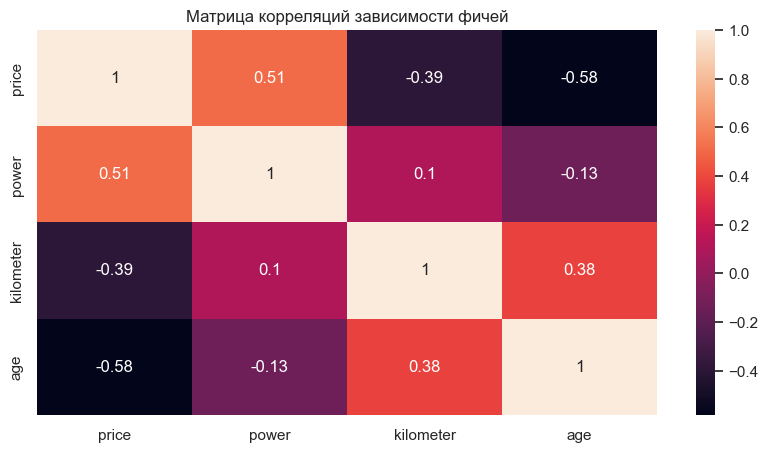

In [39]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df1.corr(), annot = True)
ax.set_title('Матрица корреляций зависимости фичей');

* Нет значений, сильно коррелирующих между собой (больше 0.7), но некоторые параметры, коррелируют с целевым параметром сильнее, это может улучшить качество модели.

In [40]:
6 / 3

2.0

### Вывод

**Обнаружили пропуски в следующих колонках:**
* **`VehicleType`** - **37490**
* **`Gearbox`** -     **19833**
* **`Model`** -       **19705**
* **`FuelType`** -    **32895**
* **`Repaired`** -    **71154**

**Проанализировали признаки:**
* Цена (евро). **`Price`**. - Установили минимальный ценник в **200** евро. Значения ниже будем отсеивать. В нашем случае это **19448** из **354369** или **~5.5%**. Приемлимо..
* Тип автомобильного кузова. **`VehicleType`** .  Неизвестно **37490** значений. Это чуть больше **10%** от всей нашей выборки. Удалять не будем. Заменили пропуски на значение **"unknown"**.
* Год регистрации автомобиля. **`RegistrationYear`** . Замечаем очень много невероятных значений - больше **2019** года т.к актуальные данные заканчиваются **2019г** и меньше **1886** Т.к. первый автомобиль был создан в 1886 году.Нужно отсеивать.Опотным путем выбрал интервал с **1980-2020гг**. Отсеели **3137** строк что меньше **1%**
* Тип коробки передач. **`Gearbox`** . - **19833** неизвестных значений. Заменили пропуски на значение **"unknown"**.
* Мощность (л. с.). **`Power`** . Исходя из логики мы понимаем что мощность не может быть равна 0 и не может привышать(если это конечно не спорткар) 600л.с
Так что взяли интервал **от 30 до 600л.с** такмх строк **35116** примерно **10%** многовато но и работать с такими данными нельзя так что убирали.
* Модель автомобиля. **`Model`** . - Неопределенных значений **19705**. Заменим пропуски на значение **"unknown"**.
* Пробег. **`Kilometer`** . - Здесь всё хорошо.
* Месяц регистрации автомобиля. **`RegistrationMonth`** .  Значение 0 в логику не вкладывается. Заменили его на 1. После чего данные год регистрации и месяц регистрации привели к одной дате и рассчитали возраст автомобиля на момент создания анкеты.
* Расчет возраста автомобиля на момент публикации
  * На основании года и месяца регистрации найдем дату регистрации.
  * Отталвиваясь от этой даты и даты создания анкеты найдем возраст машины. 
  * Округлим до целых. Т.к. при покупке автомобиля пользователи, обычно, смотрят именно на целое число лет, дроби их не интересуют, поэтому ими мы можем пренебречь. 
  * Значений много **(~4%)**, но избавиться от них нужно.
* Тип топлива. **`FuelType`** . - Неопределенных значений **32895**. Заменим пропуски на значение **"unknown"**.
* Марка автомобиля. **`Brand`** . - Здесь всё ок.
* Была машина в ремонте или нет. **`Repaired`** . **71154** неизвестных значений. Удалять столько - затея плохая. Заменим пропуски на значение **"unknown"**.
* Количество фотографий автомобиля. **`NumberOfPictures`** . Избавились от этого столбца.
* Почтовый индекс владельца анкеты (пользователя). **`PostalCode`** . Избавились и от этого столбца

* Приняли решение избавиться от следующих столбцов:
  * **`DateCrawled`**
  * **`RegistrationYear`**
  * **`RegistrationMonth`**
  * **`DateCreated`**
  * **`NumberOfPictures`**
  * **`PostalCode`**
  * **`LastSeen`**
  * **`reg_date`**


* На входе у нас было **354369** наблюдений, после предобработки осталось - **291515**. Нам пришлось избавилиться от **18%** данных.

* Нет значений, сильно коррелирующих между собой (**больше 0.7**), но некоторые параметры, коррелируют с целевым параметром сильнее, это может улучшить качество модели.

### 1.3 Кодирование данных

**Прежде чем приступить к кодировке наших данных, разделим нашу выборку на тестовую и обучающую.**

In [41]:
features = df.drop('price', axis=1)
target = df['price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=12345, 
                                                    )

In [43]:
X_train.shape, X_test.shape

((231111, 9), (57778, 9))

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.25,
                                                      random_state=12345, 
                                                      )

In [45]:
X_train.shape,y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((173333, 9), (173333,), (57778, 9), (57778,), (57778, 9), (57778,))

**Теперь перекодируем категориальные признаки.**

In [46]:
ohe_features_lm = X_train.select_dtypes(include='object').columns.to_list()
print(ohe_features_lm)

['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']


In [47]:
num_features = X_train.select_dtypes(exclude='object').columns.to_list()
num_features

['power', 'kilometer', 'age']

**Кодирование OneHotEncoder**

In [48]:
X_train_lm = X_train.copy()
X_test_lm = X_test.copy()
X_valid_lm = X_valid.copy()

In [49]:
# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
# задаём handle_unknown='ignore':
# игнорируется ранее невстречающиеся значения признака (при transform)
enc_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
enc_ohe.fit(X_train_lm[ohe_features_lm])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
X_train_lm[enc_ohe.get_feature_names_out()] = enc_ohe.transform(X_train_lm[ohe_features_lm])

# удаляем незакодированные категориальные признаки (изначальные колонки)
X_train_lm = X_train_lm.drop(ohe_features_lm, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
X_train_lm[num_features] = scaler.fit_transform(X_train_lm[num_features])

# смотрим на результат
X_train_lm.head()

,power,kilometer,age,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_unknown,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes
195582,0.177526,0.587413,-0.807189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129188,-0.553910,-0.785425,-0.807189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14402,-0.103795,0.587413,0.218846,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203316,-0.610174,-0.099006,1.073875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248200,-0.066286,0.587413,0.560857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидационную
X_valid_lm[
    enc_ohe.get_feature_names_out()
] = enc_ohe.transform(X_valid_lm[ohe_features_lm])

X_valid_lm = X_valid_lm.drop(ohe_features_lm, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем валидационную
X_valid_lm[num_features] = scaler.transform(
    X_valid_lm[num_features]
)

# смотрим на результат
X_valid_lm.head()

,power,kilometer,age,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_unknown,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes
68208,-0.103795,0.587413,-0.294172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129691,-0.103795,0.587413,0.902869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12287,-1.154062,-0.785425,1.928904,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146546,-0.366362,0.587413,0.047840,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
207937,-1.154062,0.587413,0.389852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
X_test_lm[
    enc_ohe.get_feature_names_out()
] = enc_ohe.transform(X_test_lm[ohe_features_lm])

X_test_lm = X_test_lm.drop(ohe_features_lm, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
X_test_lm[num_features] = scaler.transform(
    X_test_lm[num_features]
)

# смотрим на результат
X_test_lm.head()

,power,kilometer,age,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_unknown,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes
337491,-0.272588,0.587413,0.389852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168163,0.346319,0.587413,-1.320207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240846,-1.266591,-1.059992,1.415887,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
186621,0.533866,0.587413,1.415887,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342475,-0.591419,0.587413,-0.294172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Кодирование OrdinalEncoder**

In [52]:
ce_ord = ce.OrdinalEncoder(cols = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired'])
X_train = ce_ord.fit_transform(X_train)
X_test = ce_ord.transform(X_test)
X_valid = ce_ord.transform(X_valid)

In [53]:
numeric = ['power','kilometer','age']
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
X_valid[numeric]= scaler.transform(X_valid[numeric])

### 2.Обучение моделей

**Прежде чем приступим к обучению модели, напишем функцию  RMSE и сделаем оценку для кросс-валидации**

In [54]:
def RMSE(target,predictions):
    MSE = mean_squared_error(target, predictions)
    return MSE ** 0.5
RMSE_score = make_scorer(RMSE, greater_is_better=False)

#### LinearRegression

In [55]:
model_lr = LinearRegression().fit(X_train_lm, y_train)

In [56]:
%%time
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model_lr,parameters, cv=4, scoring = RMSE_score, n_jobs=-1)
grid.fit(X_train_lm, y_train)
grid.best_params_

CPU times: total: 16.3 s
Wall time: 1min 6s


{'copy_X': True, 'fit_intercept': True}

In [57]:
%%time
lr_train = LinearRegression(**grid.best_params_).fit(X_train_lm, y_train)

CPU times: total: 12.7 s
Wall time: 3.95 s


In [58]:
%%time
lr_pred = lr_train.predict(X_valid_lm)

CPU times: total: 469 ms
Wall time: 359 ms


In [59]:
rmse_lr = np.sqrt(mse(y_valid, lr_pred))
print("LinearRegression RMSE: %.2f" % rmse_lr) 

LinearRegression RMSE: 2374.06


#### LGBM модель

In [60]:
lgbm_params = {
    'n_estimators': [10,50,100],
    'max_depth': [15,50],
    'num_leaves': [10,20,31],
    'learning_rate': [0.1]
}
lgbm_reg_model = LGBMRegressor(random_state=42) 

In [61]:
%%time
lgbm_model = GridSearchCV(lgbm_reg_model,
                             lgbm_params,
                             cv=4,
                             scoring = RMSE_score,
                             n_jobs=-1,
                             verbose=False).fit(X_train, y_train)
lgbm_model.best_params_

CPU times: total: 3.7 s
Wall time: 19.6 s


{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 10, 'num_leaves': 10}

In [62]:
%%time
lgbm_train = LGBMRegressor(**lgbm_model.best_params_).fit(X_train, y_train)

CPU times: total: 938 ms
Wall time: 242 ms


In [63]:
%%time
lgbm_pred = lgbm_train.predict(X_valid)

CPU times: total: 93.8 ms
Wall time: 42.7 ms


In [64]:
rmse_lgbm = np.sqrt(mse(y_valid, lgbm_pred))
print("LGBMRegressor RMSE: %.2f" % rmse_lgbm) 

LGBMRegressor RMSE: 2782.71


####  CatBoost

In [65]:
catboost_params = {
    'learning_rate': [0.1],
    'iterations': [50, 100, 200],
    'max_depth': [2, 4, 6]
}
catboost_model = CatBoostRegressor(random_state=42,silent=True)

In [66]:
%%time
cat_model = GridSearchCV(catboost_model, param_grid = catboost_params, cv = 4, n_jobs=-1, scoring=RMSE_score).fit(X_train, y_train)

cat_model.best_params_

CPU times: total: 3.97 s
Wall time: 39.6 s


{'iterations': 50, 'learning_rate': 0.1, 'max_depth': 2}

In [67]:
%%time
cat_train = CatBoostRegressor(**cat_model.best_params_,  logging_level='Silent').fit(X_train, y_train)

CPU times: total: 2.98 s
Wall time: 634 ms


In [68]:
%%time
cat_pred = cat_train.predict(X_valid)

CPU times: total: 15.6 ms
Wall time: 11.1 ms


In [69]:
cat_rmse = np.sqrt(mse(y_valid,cat_pred))
print("CatBoostRegressor RMSE: %.2f" % cat_rmse) 

CatBoostRegressor RMSE: 2245.44


#### DecisionTree

In [70]:
DT_model = DecisionTreeRegressor(random_state=42)
treeregressor_params = {'max_depth':range (1,10), 'min_samples_split':range(2,6), 'min_samples_leaf':range(1,10) }

In [71]:
%%time
DT_model = GridSearchCV(DT_model , param_grid = treeregressor_params, cv=5,
                                            scoring = RMSE_score, n_jobs=-1)
DT_model.fit(X_train,y_train)
DT_model.best_params_

CPU times: total: 1min 2s
Wall time: 2min 7s


{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [72]:
%%time
DT_train = DecisionTreeRegressor(**DT_model.best_params_).fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 85.6 ms


In [73]:
%%time
DT_pred = DT_train.predict(X_valid)

CPU times: total: 15.6 ms
Wall time: 13.2 ms


In [74]:
DT_rmse = np.sqrt(mse(y_valid, DT_pred))
print("DecisionTreeRegressor RMSE: %.2f" % DT_rmse) 

DecisionTreeRegressor RMSE: 3593.29


### 3. Анализ моделей

In [75]:
print('LinearRegression:', end = '')
print()
print(f'RMSE:{rmse_lr.round(2)}, скорость предсказания: 260 ms, время обучения: 2.87 s')
print('LightGBM:', end = '')
print()
print(f'RMSE:{rmse_lgbm.round(2)}, скорость предсказания: 96.8 ms, время обучения: 540 ms')
print('Catboost:', end = '')
print()
print(f'RMSE:{cat_rmse.round(2)}, скорость предсказания: 13 ms, время обучения: 3.27 s')
print('DecisionTree:', end = '')
print()
print(f'RMSE:{DT_rmse.round(2)}, скорость предсказания: 16.7 ms, время обучения: 542 ms')

LinearRegression:
RMSE:2374.06, скорость предсказания: 260 ms, время обучения: 2.87 s
LightGBM:
RMSE:2782.71, скорость предсказания: 96.8 ms, время обучения: 540 ms
Catboost:
RMSE:2245.44, скорость предсказания: 13 ms, время обучения: 3.27 s
DecisionTree:
RMSE:3593.29, скорость предсказания: 16.7 ms, время обучения: 542 ms


#### Вывод

* **Обучение на валидационной выборке**
* **`RMSE`**
  * `LinearRegression` 2374.06
  * `LightGBM:` 2782.71
  * **`CatBoost:` 2245.44**
  * `DecisionTrees:` 3593.29
 
* **время обучения:**
  * `LinearRegression` 2.87 s
  * **`LightGBM:` 540 ms**
  * `CatBoost:` 3.27 s
  * `DecisionTrees:` 542 ms
  
* **время предсказания** 
  * `LinearRegression`  260 ms
  * `LightGBM:` 96.8 ms
  * **`CatBoost:`13 ms**
  * `DecisionTrees:` 16.7 ms

**Для данной задачи лучшая для заказчика в плане качества предсказания, скорости предсказания, времени обучения - модель `CatBoost`.**

**Проверим на тестовой выборке**

In [76]:
%%time
final_cat_pred = cat_train.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 17.5 ms


In [77]:
final_cat_rmse = np.sqrt(mse(y_test, final_cat_pred))
print("CatBoostRegressor RMSE: %.2f" % final_cat_rmse)

CatBoostRegressor RMSE: 2259.40


#### Общий вывод

1. Были загружены и переработаны  данные
2. Были перекодированы и стандартизированы данные. Произвели раделение df на тренировачную и тестовую выборки.
3. Были обучены на тренировачной выборки различные модели машинного обучения.
4. Проанализировав полученные данные было принято решение использовать модель **`CatBoost`**
* **Обучение на валидационной выборке**
* **`RMSE`**
  * `LinearRegression` 2374.06
  * `LightGBM:` 2782.71
  * **`CatBoost:` 2245.44**
  * `DecisionTrees:` 3593.29
 
* **время обучения:**
  * `LinearRegression` 2.87 s
  * **`LightGBM:` 540 ms**
  * `CatBoost:` 3.27 s
  * `DecisionTrees:` 542 ms
  
* **время предсказания** 
  * `LinearRegression`  260 ms
  * `LightGBM:` 96.8 ms
  * **`CatBoost:`13 ms**
  * `DecisionTrees:` 16.7 ms
  
5. Протестировав модель **`CatBoost`** на тестовой выборке получили следующий результат:
* **`RMSE`** - **2259.40**
* **`временя предсказания`** - **9.29 ms.**

**Что полность удовлетворяет условию заказчика а иммено подобрать оптимальную модель у которой метрика `RMSE` будет менше значения в 2500.**